<a href="https://colab.research.google.com/github/debasisb/covid-19-Hawaii/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [2]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

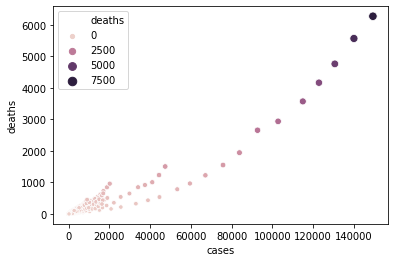

In [5]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-08', '2020-04-08', '2020-04-08', '2020-04-08',
               '2020-04-08', '2020-04-08', '2020-04-08', '2020-04-08',
               '2020-04-08', '2020-04-08'],
              dtype='datetime64[ns]', name='date', length=2049, freq=None)

In [10]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-10
Two days ago 2020-04-08


In [11]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2020-04-08,Alabama,1,2499,67
2020-04-08,Alaska,2,224,5
2020-04-08,Arizona,4,2726,80
2020-04-08,Arkansas,5,1077,18
2020-04-08,California,6,19043,506


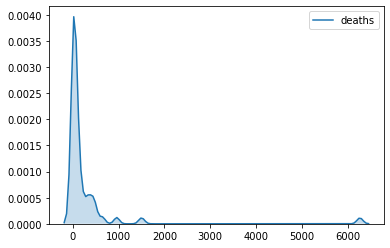

In [12]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

In [13]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-08,New York,36,149401,6268
2020-04-08,New Jersey,34,47437,1504
2020-04-08,Michigan,26,20220,959
2020-04-08,Louisiana,22,17030,652
2020-04-08,California,6,19043,506
2020-04-08,Illinois,17,15078,464
2020-04-08,Washington,53,9097,454
2020-04-08,Massachusetts,25,16790,433
2020-04-08,Georgia,13,10204,370


In [14]:
current_df.shape

(55, 4)

In [27]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'Michigan',
 'Louisiana',
 'California',
 'Illinois',
 'Washington',
 'Massachusetts',
 'Georgia',
 'Connecticut']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [29]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Georgia',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Washington'}

<Figure size 1080x360 with 0 Axes>

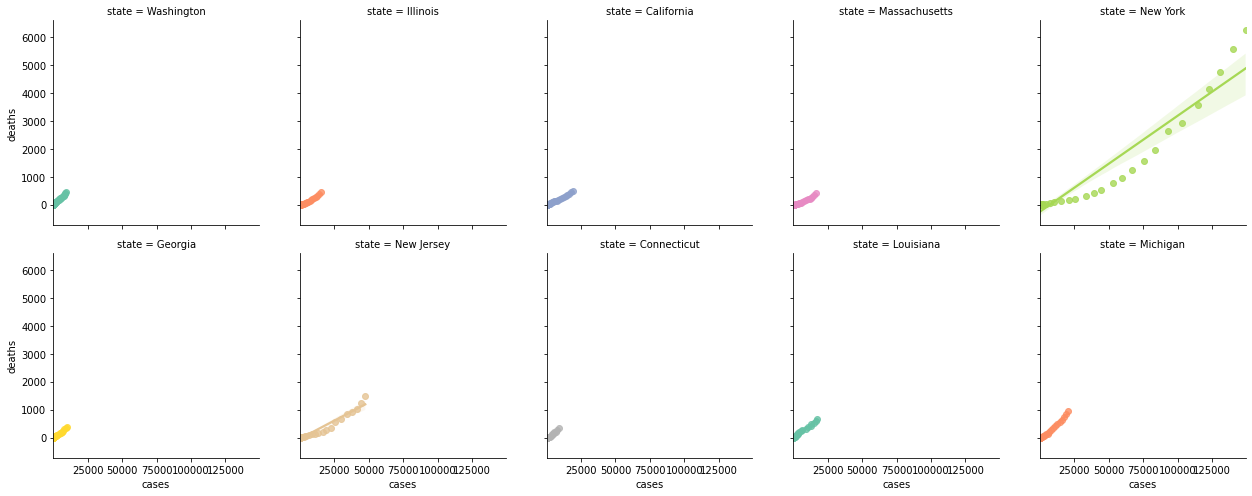

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [36]:
top_states_april_current_df = top_states_df.loc["2020-04-08":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head()

,state,cases,deaths
date,,,
2020-04-08,New York,149401,6268
2020-04-08,New Jersey,47437,1504
2020-04-08,Michigan,20220,959
2020-04-08,Louisiana,17030,652
2020-04-08,California,19043,506


In [37]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()